In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Does Height affect NFL Quarterback's preformance?

Analysis of height versus different factors, data from quarterbacks 1920, excluding quarterbacks that did not start 6 or more games in the regular season.

### Data Glossery: 
[source](https://stathead.com/football/player-season-finder.cgi?request=1&match=player_season_combined&order_by=height&year_min=2010&year_max=2023&positions%5B%5D=qb&ccomp%5B1%5D=gt&cval%5B1%5D=6&cstat%5B1%5D=games_started&ccomp%5B2%5D=gt&cval%5B2%5D=0&cstat%5B2%5D=pass_cmp&ccomp%5B3%5D=gt&cval%5B3%5D=0&cstat%5B3%5D=pass_att&height_min=60)

- Rk -- Rank
- Ht. -- Height
- GS -- Games started as an offensive or defensive player
- Cmp -- Passes completed
- Att -- Passes attempted
- From -- From Season
- To -- To Season
- G -- Games played
- Inc -- Passes incomplete (attempts-completions)
- Cmp% -- Percentage of Passes Completed
- Yds -- Yards Gained by Passing
- TD -- Passing Touchdowns
- Int -- Interceptions thrown
- Pick6 -- Interceptions thrown by this quarterback and returned for a touchdown (since 1950)
- TD% -- Percentage of Touchdowns Thrown when Attempting to Pass
- Int% -- Percentage of Times Intercepted when Attempting to Pass
- Rate -- Passer Rating, see glossary for details
- Sk -- Times sacked (first recorded in 1969, player per game since 1981)
- Yds -- Yards lost due to sacks (first recorded in 1969, player per game since 1981)
- Sk% -- Percentage of Time Sacked when Attempting to Pass: Times Sacked / (Passes Attempted + Times Sacked)
- Y/A -- Yards gained per pass attempt
- AY/A -- Adjusted Yards gained per pass attempt
- ANY/A -- Adjusted Net Yards per Pass Attempt
- Y/C -- Yards gained per pass completion (Passing Yards) / (Passes Completed)
- Y/G -- Yards gained per game played
- Succ% -- Passing Success Rate
- W -- Team wins in games started by this QB (regular season)
- L -- Team losses in games started by this QB (regular season)
- T -- Team ties in games started by this QB (regular season)
- 4QC -- Comebacks led by quarterback.
- GWD -- Game-winning drives led by quarterback.
- Wt. -- Weight
- BMI -- Body Mass Index
- Pos -- Position

Full glossery can be found [here](/full_glossery.txt)

The code below reads in the data and filters it by QB's that have started 12 or more games in the regular season.
It also adds a column on wherether or not the player is 6'3 and taller or not

In [2]:
qb = pd.read_csv('qb_starters.csv')
qb.pop('Rk')
qb.pop('Team')
qb.pop('-9999')
qb = qb[qb['GS'] >=12]
def convert_to_inches(height):
    feet, inches = height.split('-')
    return int(feet) * 12 + int(inches)
def is_tall(height):
    if height >= 75:
        return True
    return False
qb['Height'] = qb['Ht.'].apply(convert_to_inches)
qb['Tall'] = qb['Height'].apply(is_tall)
qb = qb.sort_values(by = 'Height')
grouped = qb
grouped = grouped.groupby('Height')
count = qb.groupby('Ht.')['Player'].count()
tall = qb.groupby('Tall')['Player'].count()

The breakdown of Quarterbacks by height is below, as you can see there is not a lot of data for short players so the data has been compilied into whether or not the player is 6'3" or taller

In [3]:
pd.DataFrame(count)

,Player
Ht.,
5-10,7
5-11,14
5-5,1
5-6,1
5-7,1
5-8,2
5-9,1
6-0,26
6-1,70


This is the breakdown of Quarterbacks that are 6'3" and above or not

In [4]:
pd.DataFrame(tall)

,Player
Tall,
False,209
True,217


The rest of the data is split and is divided based on the amount of people per category to get the average in order to have an equal comparison

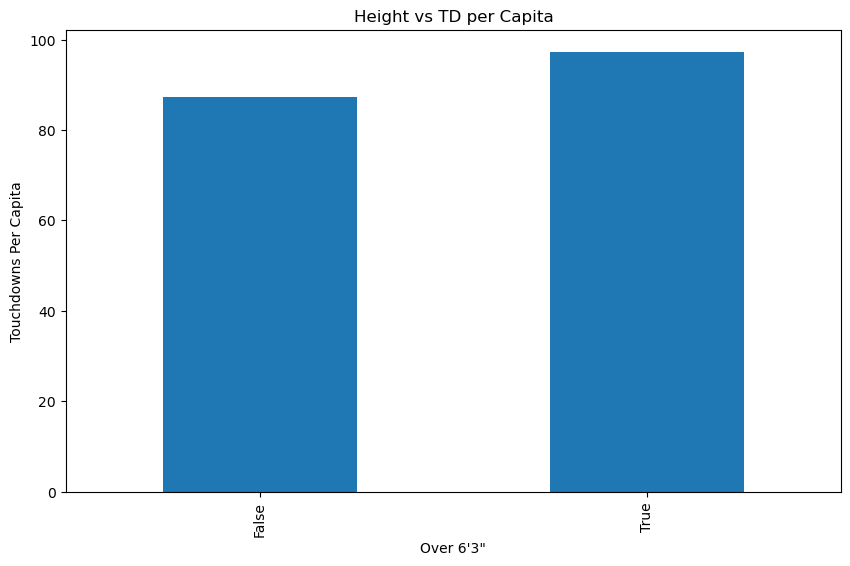

,0
Tall,
False,87.215311
True,97.281106


In [6]:
gr = qb.groupby('Tall')['TD'].sum()/tall
plt.figure(figsize=(10, 6)) 
gr.plot(kind = "bar")
plt.xlabel('Over 6\'3"')
plt.ylabel('Touchdowns Per Capita')
plt.title('Height vs TD per Capita')
plt.savefig('img/TD.png')
plt.show()
pd.DataFrame(gr)

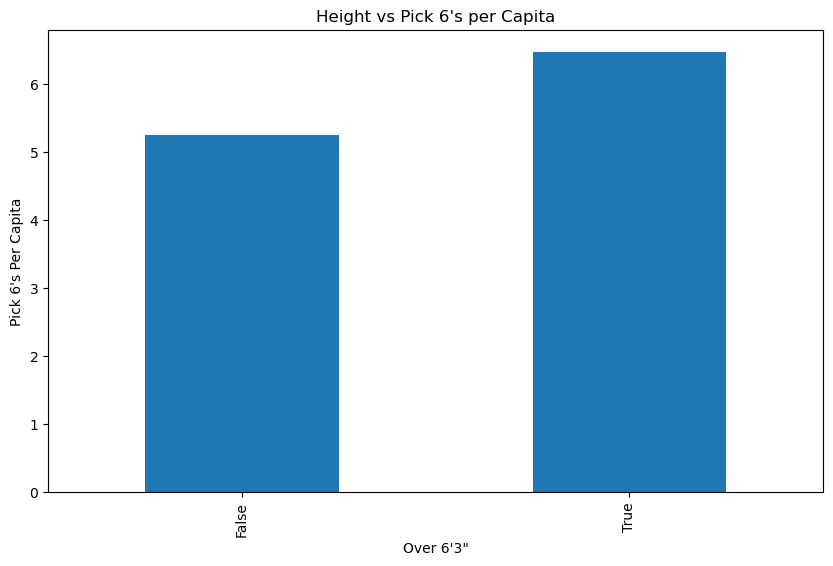

,0
Tall,
False,5.253589
True,6.470046


In [17]:
gr = qb.groupby('Tall')['Pick6'].sum()/tall
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Pick 6\'s Per Capita')
plt.title('Height vs Pick 6\'s per Capita')
plt.savefig('img/Pick6.png')
plt.show()
pd.DataFrame(gr)

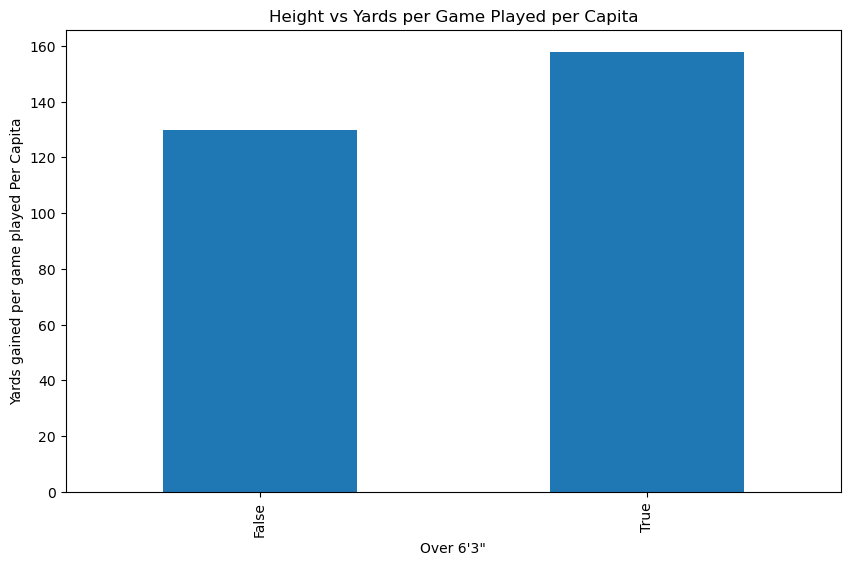

,0
Tall,
False,129.925837
True,157.893548


In [8]:
gr = qb.groupby('Tall')['Y/G'].sum()/tall
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Yards gained per game played Per Capita')
plt.title('Height vs Yards per Game Played per Capita')
plt.savefig('img/YardsPerGame.png')
plt.show()
pd.DataFrame(gr)

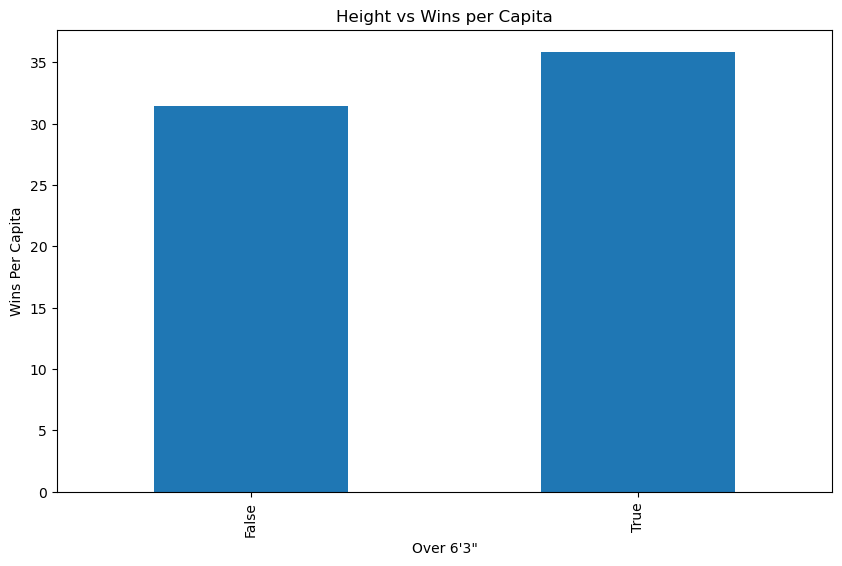

,0
Tall,
False,31.464115
True,35.852535


In [9]:
gr = qb.groupby('Tall')['W'].sum()/tall
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Wins Per Capita')
plt.title('Height vs Wins per Capita')
plt.savefig('img/Wins.png')
plt.show()
pd.DataFrame(gr)

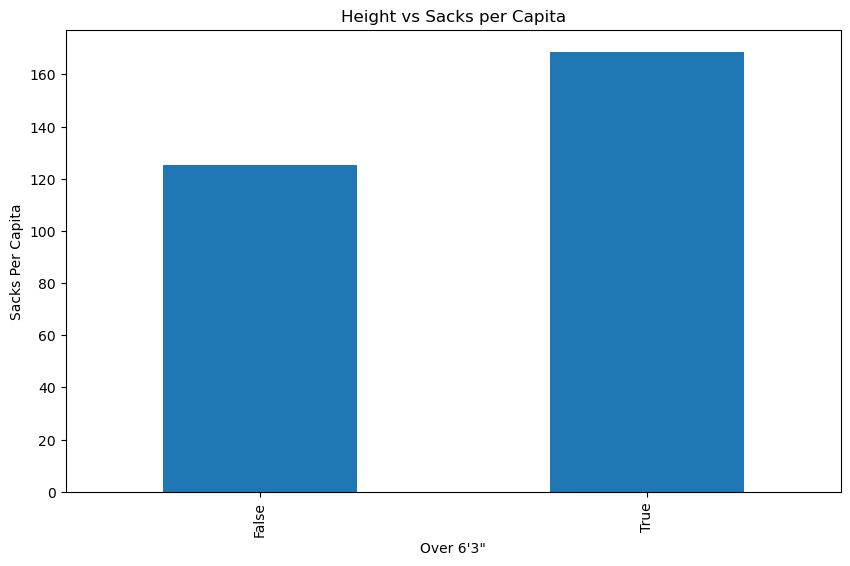

,0
Tall,
False,125.143541
True,168.640553


In [10]:
gr = qb.groupby('Tall')['Sk'].sum()/tall
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Sacks Per Capita')
plt.title('Height vs Sacks per Capita')
plt.savefig('img/sacks.png')
plt.show()
pd.DataFrame(gr)

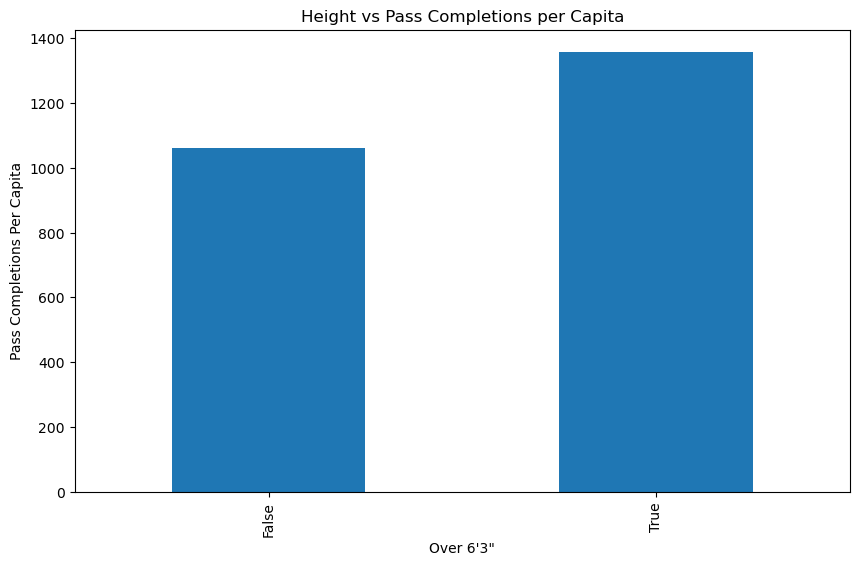

,0
Tall,
False,1061.277512
True,1357.788018


In [11]:
gr = qb.groupby('Tall')['Cmp'].sum()/tall
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Pass Completions Per Capita')
plt.title('Height vs Pass Completions per Capita')
plt.savefig('img/PassComp.png')
plt.show()
pd.DataFrame(gr)

### Superbowl Quarterbacks 

How many superbowls have been won by Quarterbacks that were 6'3" or taller, includes any QB that has played in the game

[source](https://stathead.com/football/player-game-finder.cgi?request=1&order_by=name_display_csk&timeframe=seasons&comp_type=post&phase_id=superbowl&height_min=60&season_positions%5B%5D=qb)

In [30]:
sb = pd.read_csv('superbowl.csv')
sb = sb.drop(columns=['Player-additional', 'N', 'Week', 'Team', 'Opp', 'Age', 'Day', 'G#','Rk'])
height = qb[['Player','Ht.','Tall']]
def win(result):
    if result[0] == 'W':
        return True
    return False
sb['won'] = sb['Result'].apply(win)
sb = sb[sb['won'] == True]
sb_m = pd.merge(sb, height, on='Player')
tall_sb = pd.DataFrame(sb_m.groupby('Tall')['Player'].count())

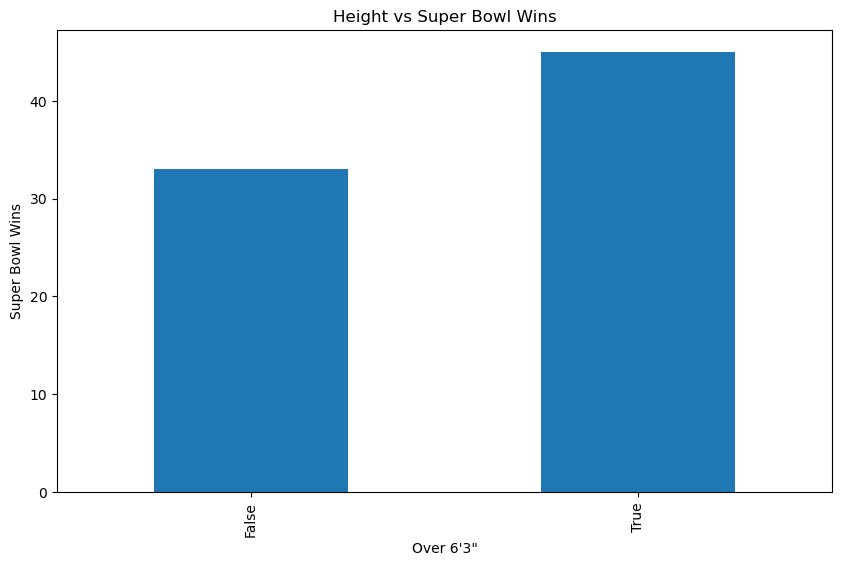

,won
Tall,
False,33
True,45


In [31]:
gr = sb_m.groupby('Tall')['won'].sum()
plt.figure(figsize=(10, 6))
gr.plot(kind = 'bar')
plt.xlabel('Over 6\'3"')
plt.ylabel('Super Bowl Wins')
plt.title('Height vs Super Bowl Wins')
plt.savefig('img/SB.png')
plt.show()
pd.DataFrame(gr)